## Ames Housing Data - An Iteration
Laura Roman
August 2019

### Executive Summary:

The Objective of this project is build a regression model that accurately predicts housing prices

**[Step 1: Exploratory Data Analysis:](#Step-1:-Exploratory-Data-Analysis:)** <br>
Visualize relationship of features to Saleprice to decide which features to include <br>
**[Step 2: Data Cleaning:](#Step-2:-Data-Cleaning:)**<br>
Remove outliers, find and fill nulls appropriately, ordinalize qualitative features, feature engineering <br>
**[Step 3: Modeling:](#Step-3:-Modeling:)** <br>
Test multi-variate regression model by gradually adding features based on correlation from exploratory analysis

### Step 1: Exploratory Data Analyis:

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV
from sklearn.preprocessing import StandardScaler,Normalizer

In [74]:
train_set = pd.read_csv('./data/train.csv')
hold_out_set = pd.read_csv('./data/test.csv')                       
houses = pd.DataFrame(train_set)

In [75]:
houses.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [76]:
hold_out_set.shape

(879, 80)

In [77]:
houses.shape

(2051, 81)

In [78]:
houses.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [79]:
houses.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

**a. Building Type**

In [80]:
house_type = houses[['Bldg Type','Id']].groupby('Bldg Type').count()

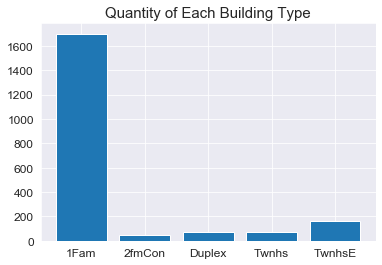

In [81]:
plt.bar(house_type.index,house_type['Id'])
plt.title("Quantity of Each Building Type",fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

**Observations:**<br>
Most houses are single family homes

**b. Year Built**

In [82]:
houses['Year Built'].min()

1872

/Users/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


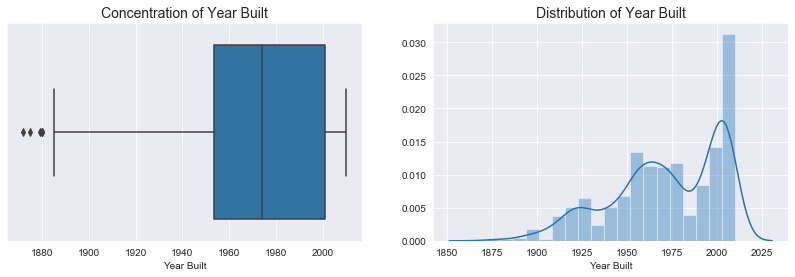

In [83]:
fig,ax = plt.subplots(1,2,figsize=(14,4))
sns.boxplot(houses['Year Built'],ax=ax[0])
sns.distplot(houses['Year Built'],ax=ax[1])
ax[0].set_title("Concentration of Year Built",fontsize=14)
ax[1].set_title("Distribution of Year Built",fontsize=14);

**Observations:**<br>Ames Housing Data for houses in Ames, Iowa the majority of which were build 1953-2010 (oldest built in 1872) and sold 2006-2010.

**c. Neighborhood**

In [84]:
nb = houses[['Neighborhood','SalePrice']]
nb_count = nb.groupby('Neighborhood').count().sort_values('SalePrice',ascending=False)
nb_sp = nb.groupby('Neighborhood').mean().sort_values('SalePrice',ascending=False)

houses[houses['Neighborhood']=='Sawyer']['SalePrice'].mean()

137181.9099099099

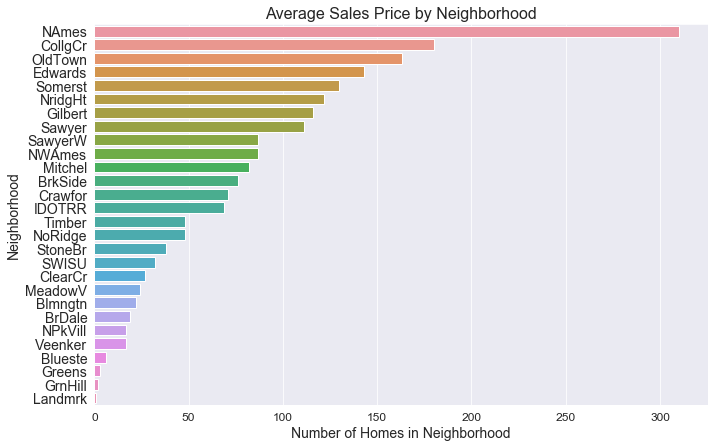

In [85]:
plt.figure(figsize=(11,7))
sns.barplot(y=nb_count.index,x= nb_count['SalePrice'],ci=None)
plt.title("Average Sales Price by Neighborhood",fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Neighborhood",fontsize=14)
plt.xlabel("Number of Homes in Neighborhood",fontsize=14);

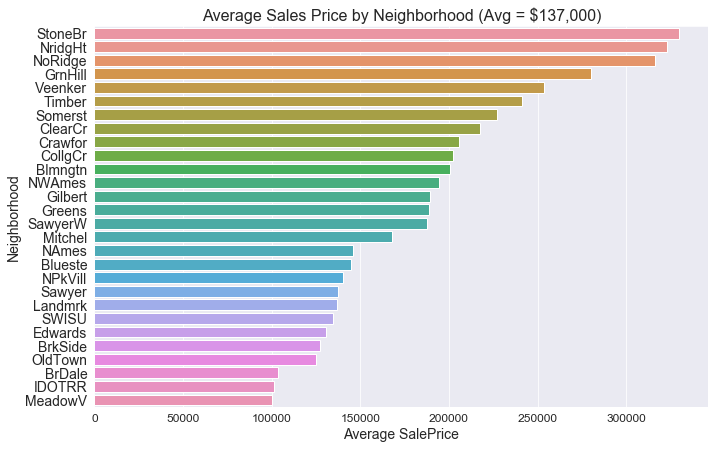

In [86]:
plt.figure(figsize=(11,7))
sns.barplot(y=nb_sp.index,x= nb_sp['SalePrice'],ci=None)
plt.title("Average Sales Price by Neighborhood (Avg = $137,000)",fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Neighborhood",fontsize=14)
plt.xlabel("Average SalePrice",fontsize=14);

**Observations:**<br>Looks like Neighborhood maybe worthwhile factoring in. 
We'll need to ordinalize.

**d. Correlation of features with SalePrice**

In [87]:
df_corr = pd.DataFrame(houses.corr()['SalePrice'].sort_values(ascending=False))
df_corr.rename(columns={"SalePrice":"Corr_with_SalePrice"},inplace=True)
df_corr.head(10)

,Corr_with_SalePrice
SalePrice,1.000000
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.650270
Garage Cars,0.648220
Total Bsmt SF,0.628925
1st Flr SF,0.618486
Year Built,0.571849
Year Remod/Add,0.550370
Full Bath,0.537969


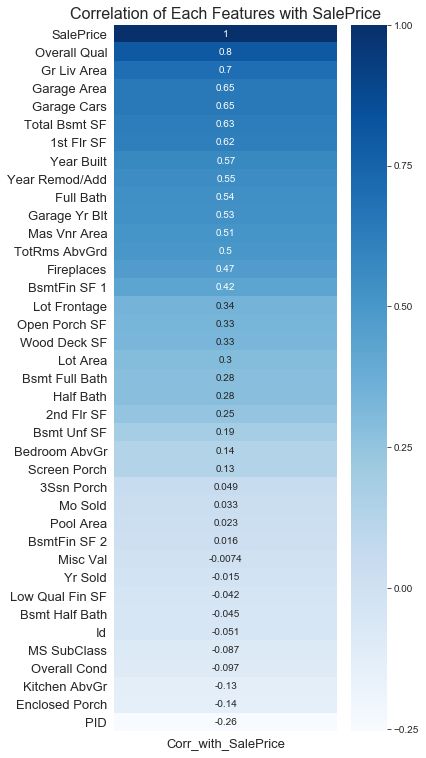

In [88]:
plt.figure(figsize=(5,13))
sns.heatmap(df_corr,cmap="Blues",annot=True)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title("Correlation of Each Features with SalePrice",fontsize=16);

**Features that appear to be correlated with Saleprice:**

1. Overall Qual - scale of 1 to 10
2. Garage Area - need to scale
3. Garage Cars  - need to scale
4. Several SF measures - possibly need to scale? (these must be in thousands)
5. Year Built - need to scale (1950=0)
6. Year Remod/Add - need to scale (1872=0)
7. TotRms AbvGrd

Qualitative: 
Consider Neighborhoods

**e. lot Features with High Correlation to SalePrice:**
   - Year Built, 
   - Overall Quality, 
   - Garage Area, 
   - Garage Cars,
   - Year Remod/Add,
   - Total Above Ground Rooms

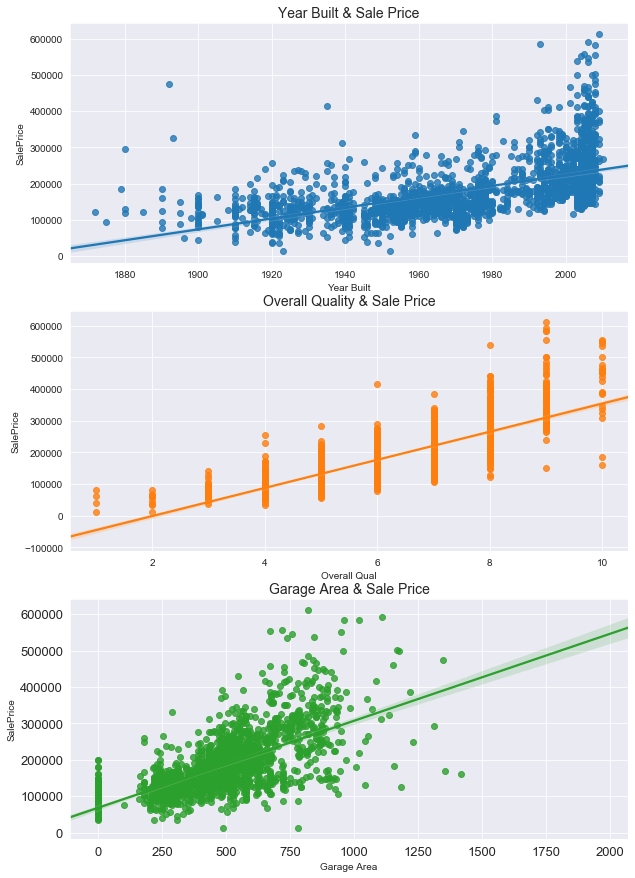

In [89]:
fig,ax = plt.subplots(3,1,figsize=(10,15),sharex=False)
sns.regplot(x="Year Built",y="SalePrice", data=houses,ax=ax[0])
sns.regplot(x="Overall Qual",y="SalePrice", data=houses,ax=ax[1])
sns.regplot(x="Garage Area",y="SalePrice", data=houses,ax=ax[2])
ax[0].set_title("Year Built & Sale Price",fontsize=14)
ax[1].set_title("Overall Quality & Sale Price",fontsize=14)
ax[2].set_title("Garage Area & Sale Price",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show();

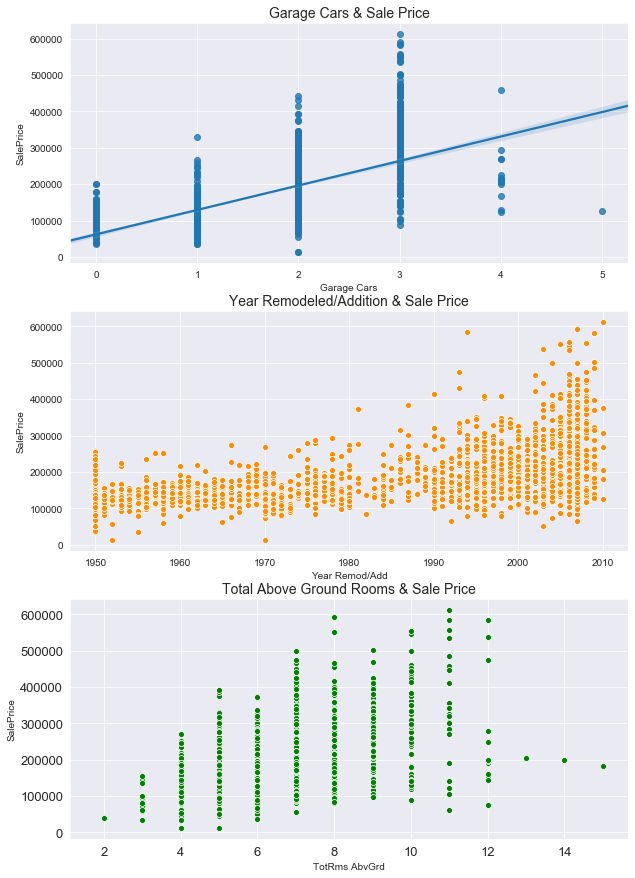

In [90]:
fig,ax = plt.subplots(3,1,figsize=(10,15),sharex=False)
sns.regplot(x="Garage Cars",y="SalePrice", data=houses,ax=ax[0])
sns.scatterplot(houses['Year Remod/Add'],houses['SalePrice'],color='darkorange',ax=ax[1])
sns.scatterplot(houses['TotRms AbvGrd'],houses['SalePrice'],color='green',ax=ax[2])
#sns.regplot(x='Year Remod/Add',y="SalePrice", data=houses,ax=ax[2])
ax[0].set_title("Garage Cars & Sale Price",fontsize=14)
ax[1].set_title("Year Remodeled/Addition & Sale Price",fontsize=14)
ax[2].set_title("Total Above Ground Rooms & Sale Price",fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show();

## <font color='magenta'> REMOVE OUTLIERS

[Back to Top](#Executive-Summary:)

### Step 2: Data Cleaning:

In [91]:
from sklearn import preprocessing

#### For Total SF calcualtion: 

Extract all numeric columns

In [92]:
#Filter for numeric_features except for ID, PID (because we don't need them), and SalePrice (because its what we are trying to predict)
numeric_features=list(train_set._get_numeric_data().drop(['Id','PID','SalePrice'],axis=1).columns)

In [93]:
houses[numeric_features].columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold'],
      dtype='object')

**Create Total SF feature**

In [94]:
#Extract any feature containing 'SF'
SF_list= list(filter(lambda k: 'SF' in k, numeric_features))
SF_list

['BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Wood Deck SF',
 'Open Porch SF']

In [95]:
#Basement SF measurements overlap, so we remove them
SF_list.remove('BsmtFin SF 1')
SF_list.remove('BsmtFin SF 2') 
SF_list.remove('Bsmt Unf SF')
#Low Qual Fin SF means: LowQualFinSF: Low quality finished square feet (all floors), and may be duplicative
# of 1st & 2nd Floor SF so we remove it as well
SF_list.remove('Low Qual Fin SF')
SF_list

['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Wood Deck SF', 'Open Porch SF']

Note: Gr Liv Area (Above Ground Living Area is also duplicative, so its not added to the SF total)

In [96]:
#Define a function to calculate total square footage from the 9 squre footage features
def total_square_feet(list_of_cols,df):
    tot=0
    for each in list_of_cols:
        tot += df[each]
    return tot

In [97]:
#Add Total SF Feature to dataset
houses['Total_SF'] = total_square_feet(SF_list,houses)

In [98]:
houses[['Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Wood Deck SF', 'Open Porch SF','Total_SF']].head(10)

,Total Bsmt SF,1st Flr SF,2nd Flr SF,Wood Deck SF,Open Porch SF,Total_SF
0,725.0,725,754,0,44,2248.0
1,913.0,913,1209,0,74,3109.0
2,1057.0,1057,0,0,52,2166.0
3,384.0,744,700,100,0,1928.0
4,676.0,831,614,0,59,2180.0
5,1517.0,1888,0,0,0,3405.0
6,547.0,1072,0,0,44,1663.0
7,1188.0,1188,0,0,0,2376.0
8,924.0,924,0,0,324,2172.0
9,1040.0,1040,1040,335,0,3455.0


/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


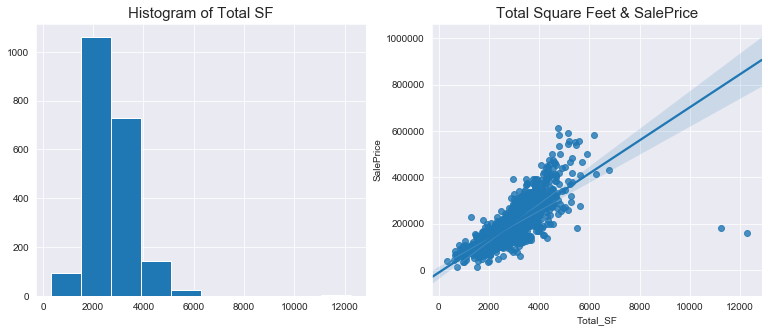

In [99]:
#Verify that all Total SF is within a reasonable range.
fig,ax = plt.subplots(1,2,figsize=(13,5))
ax[0].hist(houses['Total_SF'])
sns.regplot(x="Total_SF", y = "SalePrice",data=houses,ax=ax[1])
ax[0].set_title("Histogram of Total SF",fontsize=15)
ax[1].set_title("Total Square Feet & SalePrice",fontsize=15);

**Observations:** <br>
There are two Total SF outliers greater than 10,000

In [101]:
houses.sort_values(by=['Total_SF'],ascending=False).head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,Total_SF
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,480,Gd,NaN,NaN,0,1,2008,New,160000,12258.0
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,NaN,NaN,Elev,17000,10,2007,New,183850,11220.0
328,1773,528366050,20,RL,NaN,12692,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2007,WD,430000,6767.0


In [102]:
houses.shape

(2051, 82)

In [103]:
#drop rows 960, 1885
houses.drop([960,1885],axis=0,inplace=True)

In [104]:
houses.shape

(2049, 82)

Ordinalize Neighborhoods

In [105]:
labels = houses['Neighborhood'].astype('category').cat.categories.tolist()
replace_map = {'Neighborhood' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

In [106]:
#replace country names with numerical values
houses.replace(replace_map,inplace=True)

In [107]:
houses['Neighborhood'].head()

0    23
1    24
2    16
3    27
4    24
Name: Neighborhood, dtype: int64

In [108]:
houses['Neighborhood'].isna().sum()

0

Normalize Data:


In [109]:
from sklearn import preprocessing

In [110]:
# Get column names first
##names = df.columns
# Create the Scaler object
##scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
##scaled_df = scaler.fit_transform(df)
##scaled_df = pd.DataFrame(scaled_df, columns=names)
#https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc

**Garage Area**<br>
Check and fill NaN before scaling:

In [111]:
houses[houses['Garage Area'].isna()]['Garage Area']

1712   NaN
Name: Garage Area, dtype: float64

In [112]:
houses['Garage Area'] = houses['Garage Area'].fillna(0)
houses['Garage Cars'] = houses['Garage Cars'].fillna(0)
houses['Total_SF'] = houses['Total_SF'].fillna(0)

In [113]:
X_ex = np.array(houses['Garage Area'])
norm_X_ex = preprocessing.normalize([X_ex])                                      

In [114]:
#Scale year built to min 1872=0
houses['Year Built'] = houses['Year Built'] -houses['Year Built'].min()

In [115]:
#Scale Year Remod/Add to min 1950
houses['Year Remod/Add'] = houses['Year Remod/Add']-houses['Year Remod/Add'].min()

**Still need to normalize SF of house and garage**

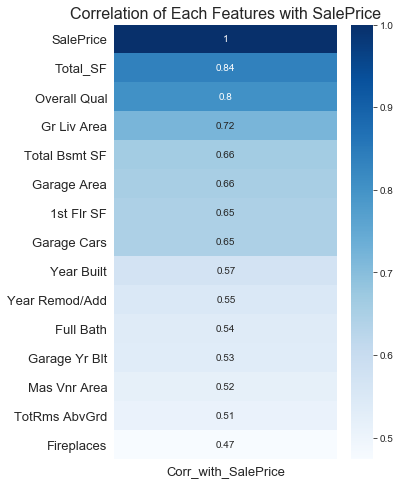

In [142]:
df_corr = pd.DataFrame(houses.corr()['SalePrice'].sort_values(ascending=False).head(15))
df_corr.rename(columns={"SalePrice":"Corr_with_SalePrice"},inplace=True)
df_corr.head(10)

plt.figure(figsize=(5,8))
sns.heatmap(df_corr,cmap="Blues",annot=True)
plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.title("Correlation of Each Features with SalePrice",fontsize=16);

When we rerun correlation, Total Square Feet is way up near the top

[Back to Top](#Executive-Summary:)

### Step 3: Modeling:

### 1. MVR with Only Year Build, Overall Qual

In [162]:
def run_model(features):
    X = houses[features]
    y = houses['SalePrice']  
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    lr = LinearRegression()

    scores = cross_val_score(lr,X_train,y_train,cv=4).mean()
    return scores

In [163]:
features = ['Year Built','Overall Qual']

In [164]:
cvscore = run_model(features)
score_list = []
score_list.append(cvscore)
score_list

[0.6474113190416496]

### 2. MVR with Year Build, Overall Qual, and Total SF

In [165]:
features = ['Year Built','Overall Qual', 'Total_SF']

In [166]:
cvscore = run_model(features)
score_list.append(cvscore)
score_list

[0.6474113190416496, 0.8125426594376641]

## 3. MVR add Garage area

In [167]:
features = ['Year Built', 
            'Overall Qual',
            'Total_SF',
            'Garage Area']      

In [168]:
cvscore = run_model(features)
score_list.append(cvscore)
score_list

[0.6474113190416496, 0.8125426594376641, 0.8136444072298823]

### 4. MVR Add Neighborhood

In [169]:
features = ['Year Built','Overall Qual', 'Total_SF', 'Garage Area','Neighborhood']

In [170]:
cvscore = run_model(features)
score_list.append(cvscore)
score_list

[0.6474113190416496,
 0.8125426594376641,
 0.8136444072298823,
 0.8261102208674915]

### 5.  MVR Add Garage Area, Garage Cars, Year Remod/Add, Total Rms Abv Grd

In [171]:
features = ['Year Built', 
            'Overall Qual',
            'Total_SF',
            'Neighborhood',
            'Garage Area',
            'Garage Cars',
            'Year Remod/Add',
            'TotRms AbvGrd']       

In [172]:
cvscore = run_model(features)
score_list.append(cvscore)
score_list

[0.6474113190416496,
 0.8125426594376641,
 0.8136444072298823,
 0.8261102208674915,
 0.8215366302585029]

In [173]:
model_list = ['MVR with Only Year Build, Overall Qual',
              'MVR with Year Build, Overall Qual, and Total SF',
              'MVR with Year Build, Overall Qual, Total SF, and Garage Area',
              'MVR Add Neighborhood',
              'MVR Add Garage Area, Garage Cars, Year Remod/Add, Total Rms Abv Grd']

In [174]:
df_score_results = pd.DataFrame(score_list, model_list)
df_score_results.rename(columns={0:'Cross Validation Score'},inplace=True)
df_score_results

,Cross Validation Score
"MVR with Only Year Build, Overall Qual",0.647411
"MVR with Year Build, Overall Qual, and Total SF",0.812543
"MVR with Year Build, Overall Qual, Total SF, and Garage Area",0.813644
MVR Add Neighborhood,0.826110
"MVR Add Garage Area, Garage Cars, Year Remod/Add, Total Rms Abv Grd",0.821537


**Conclusion:**
By Iteratively adding features with high correlations to Sales Price, the model that includes the following had the highest accuracy score:
- Year Built
- Overall Quality
- Total Square footage
- Garage Area
- ?? neighborhood

**Next steps:**
Add scaling for Garage Area and Total Square Feet to further improve the model

[Back to Top](#Executive-Summary:)